# UQ Project Part I & II

# Taniya Kapoor 

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt


# Part-1
# Considering one input as a random variable (br/e/ep/haim/current)

In [2]:
R = 5000000

br = 1.2               #Remanent magnetic flux density of the magnet (T)
br_min = br - 0.05*br
br_max = br + 0.05*br
#br=np.random.uniform(br_min, br_max, R)    
#br=np.random.normal((br_min+br_max)/2, (br_max-br_min)**2/12, R)    

e=0.5e-3             #air gap between the core and the yoke (m)
e_min = e - 0.15*e
e_max = e + 0.15*e
e = np.random.uniform(e_min,e_max,R)
#e = np.random.normal((e_min+e_max)/2, (e_max-e_min)**2/12, R)


ep=5e-5  #Parasitic air gap (m)
ep_min = ep - 0.4*ep
ep_max = ep + 0.4*ep
#ep = np.random.uniform(ep_min,ep_max,R)
#ep = np.random.normal((ep_min+ep_max)/2, (ep_max-ep_min)**2/12, R)


haim=10e-3    #height of the magnet (m)
haim_min = haim - 0.05*haim
haim_max = haim + 0.05*haim
#haim = np.random.uniform(haim_min,haim_max,R)
#haim = np.random.normal((haim_min+haim_max)/2, (haim_max-haim_min)**2/12, R)


current=0.0652                                  #current in the coil
current_min = current - 0.1*current
current_max = current + 0.1*current
#current = np.random.uniform(current_min,current_max,R)                              
#current = np.random.normal((current_min+current_max)/2, (haim_max-haim_min)**2/12, R)



In [3]:
rcul=8.8e-3                                        #radius of the iron core (m)
rbob=17e-3                                        #external radius of the coil (m)
rclo=20e-3                                        #external radius (m)
raim=9.4e-3                                      #Radius of the magnet (m)
hclo=6e-3                                       #height of base of the yoke (m)
hent=6e-3                                      #height of the air gap e (m)
hbob=9e-3                                       #height of the coil (m)
hpm=5e-3                                        #height of the mobil plate (m)
mur=3000                                        #relative permeability of the yoke
n=3200                                        #number of turns
#CONSTANTS
#permeability of the air
mu0=4*np.pi*1e-7
Re=e/(mu0*2*np.pi*(rbob-e)*hent)                                  #reluctance of the airgap
Rp=ep/(mu0*np.pi*rcul*rcul)+ep/(mu0*np.pi*(rclo*rclo-rbob*rbob))  #reluctance of the paraistic airgap
Ra=haim/(mu0*np.pi*raim*raim)                                     #reluctance of the magnet
ksia=br*haim/mu0                                                #magnetomotive force of the magnet
#Not supplied
#Calculation of the flux
#flux flowing through the permanent magnet
phia1=((Rp+Re)*ksia)/(Ra*Rp+Ra*Re+Re*Rp)
#magnetic flux in the mobil plate
phib1=-(Re*ksia)/(Ra*Rp+Ra*Re+Re*Rp)
force1=np.abs((phib1*phib1)/(2*mu0*np.pi*rcul*rcul)+phib1*phib1/(2*mu0*np.pi*(rclo*rclo-rbob*rbob)))
#Supplied by a current
#Calculation of the flux
#flux flowing through the permanent magnet
phia2=((Rp+Re)*(ksia)-(Re*n*current))/((Ra*Rp)+(Ra*Re)+(Re*Rp))
#magnetic flux in the mobil plate
phib2=((Ra+Re)*n*current-Re*ksia)/(Ra*Rp+Ra*Re+Re*Rp)
#calculation of the force
force2=np.abs((phib2*phib2)/(2*mu0*np.pi*rcul*rcul)+phib2*phib2/(2*mu0*np.pi*(rclo*rclo-rbob*rbob)))
m1 = np.mean(force1)
m2 = np.mean(force2)
s1 = np.std(force1)/np.sqrt(R)
s2 = np.std(force2)/np.sqrt(R)
convf1 = s1/R
convf2 = s2/R

mean for force1 147.43612763764636
mean for force2 1.1512281662903703
standard deviation for force1 by sqrt R 0.003561885062637137
standard deviation for force2 by sqrt R 0.0004826005455483245


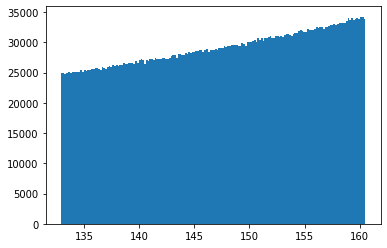

In [4]:
plt.hist(force1,bins = 'auto')
#plt.hist(force2, bins = 'auto')
#plt.show()
print("mean for force1",m1)
print("mean for force2",m2)
print("standard deviation for force1 by sqrt R",s1)
print("standard deviation for force2 by sqrt R",s2)




# part-2
# hit or Miss Method: reliability analysis 


In [5]:
# when five parameters are random variables

In [6]:
R =1000000
e=np.random.uniform(e_min,e_max,R)                                  #air gap between the core and the yoke (m)
ep=np.random.uniform(ep_min,ep_max,R)                                   #Parasitic air gap (m)
haim=np.random.uniform(haim_min,haim_max,R)                          #height of the magnet (m)
br=np.random.uniform(br_min, br_max, R)                     #Remanent magnetic flux density of the magnet (T)
current=np.random.uniform(current_min,current_max,R)            #current in the coil



In [7]:
#CONSTANTS
#permeability of the air
mu0=4*np.pi*1e-7
Re=e/(mu0*2*np.pi*(rbob-e)*hent)                                  #reluctance of the airgap
Re=e/(mu0*2*np.pi*(rbob-e)*hent)                                  #reluctance of the airgap
Rp=ep/(mu0*np.pi*rcul*rcul)+ep/(mu0*np.pi*(rclo*rclo-rbob*rbob))  #reluctance of the paraistic airgap
Ra=haim/(mu0*np.pi*raim*raim)                                     #reluctance of the magnet
ksia=br*haim/mu0                                                  #magnetomotive force of the magnet
#Not supplied
#Calculation of the flux
#flux flowing through the permanent magnet
phia1=((Rp+Re)*ksia)/(Ra*Rp+Ra*Re+Re*Rp)
#magnetic flux in the mobil plate
phib1=-(Re*ksia)/(Ra*Rp+Ra*Re+Re*Rp)
force1=np.abs((phib1*phib1)/(2*mu0*np.pi*rcul*rcul)+phib1*phib1/(2*mu0*np.pi*(rclo*rclo-rbob*rbob)))
#Supplied by a current
#Calculation of the flux
#flux flowing through the permanent magnet
phia2=((Rp+Re)*(ksia)-(Re*n*current))/((Ra*Rp)+(Ra*Re)+(Re*Rp))
#magnetic flux in the mobil plate
phib2=((Ra+Re)*n*current-Re*ksia)/(Ra*Rp+Ra*Re+Re*Rp)
#calculation of the force
force2=np.abs((phib2*phib2)/(2*mu0*np.pi*rcul*rcul)+phib2*phib2/(2*mu0*np.pi*(rclo*rclo-rbob*rbob)))
mean_force1 = np.mean(force1)
mean_force2 = np.mean(force2)
std_force1 = np.std(force1)
std_force2 = np.std(force2)



# probability to have force1 lower than 120
# probability to have force2 greater than 10
# probability to have atleast one condition above fulfilled

In [8]:
N = 0
for i in range(R):
    if force1[i]<120:
        N =  N + 1
p = N/R
print(p)

0.11142


In [9]:
np.sqrt(p*(1-p)/R)

0.0003146515272487963

In [10]:
N = 0
for i in range(R):
    if force2[i]>10:
        N =  N + 1
p = N/R
print(p)

0.009211


In [11]:
np.sqrt(p*(1-p)/R)

9.55309242025848e-05

In [12]:
N = 0
for i in range(R):
    if force1[i]<120 or force2[i]>10:
        N =  N + 1
p = N/R
print(p)

0.119562


In [13]:
np.sqrt(p*(1-p)/R)

0.00032444865257232926